In [1]:
library(ggplot2)
library(mgcv)
library(visreg)
library(reshape2)
library(ggpubr)
library(ggpattern)
library(plyr)
library(ggsignif)
library(lmerTest)

Loading required package: nlme

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required namespace: memoise


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [26]:
datax=read.csv('gmdata2.csv')
datax = na.omit(datax)
datax = datax[datax$CBF.GM < 120 ,]
datax = datax[datax$CBF.GM > 5 ,]


In [32]:
datay = datax[datax$CBFTYPE =='PVC',]
pnc = datay[datay$Datasets=='PNC',]
nki = datay[datay$Datasets=='NKI',]
age = datay[datay$Datasets=='AGE',]
irr = datay[datay$Datasets=='IRR',]
ftd = datay[datay$Datasets=='FTD',]
ftd

,sub,Datasets,CBF.GM,CBF.WM,CBFTYPE,QEI,NEG_CBF,FD,AGE,CBF_R
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11257,1014,FTD,35.45241,29.17062,PVC,0.8641500,0,0,51,1.215347
11258,1285,FTD,44.97962,40.54916,PVC,0.8582947,0,0,73,1.109261
11259,1658,FTD,33.36679,29.25494,PVC,0.8563746,0,0,70,1.140552
11260,1015,FTD,33.39101,28.28251,PVC,0.8589042,0,0,62,1.180624
11261,1286,FTD,59.02018,46.85825,PVC,0.8734335,0,0,48,1.259547
11262,1663,FTD,30.16457,26.62931,PVC,0.8483731,0,0,58,1.132758
11263,1016,FTD,32.42142,28.85487,PVC,0.8764465,0,0,48,1.123603
11264,1287,FTD,65.34709,45.05624,PVC,0.8683281,0,0,19,1.450345
11265,1686,FTD,41.06960,39.26436,PVC,0.8509552,0,0,56,1.045977


In [29]:
datay = datax[datax$CBFTYPE =='SCBF',]
pnc = datay[datay$Datasets=='PNC',]
nki = datay[datay$Datasets=='NKI',]
age = datay[datay$Datasets=='AGE',]
irr = datay[datay$Datasets=='IRR',]
ftd = datay[datay$Datasets=='FTD',]

#############################################################
cbf_Age_gam <- gam(CBF.GM ~ s(AGE, k=4), method="REML", data = datay)

#####################
## Look at results ##
#####################
summary(cbf_Age_gam)

## Nonlinear age effect
Age_pval <- summary(cbf_Age_gam)$s.table[1,4]
Age_pval

####################################
## Visualize Nonlinear Age Effect ##
####################################
plotdata <- visreg(cbf_Age_gam,'AGE',type = "conditional",scale = "linear", plot = FALSE)
smooths <- data.frame(Variable = plotdata$meta$x, 
                      x=plotdata$fit[[plotdata$meta$x]], 
                      smooth=plotdata$fit$visregFit, 
                      lower=plotdata$fit$visregLwr, 
                      upper=plotdata$fit$visregUpr)
predicts <- data.frame(Variable = "dim1", 
                       x=plotdata$res$AGE,
                       y=plotdata$res$visregRes)

CBF_Age_plot <- ggplot() + xlim(8, 85)+ ylim(0,140) +
  #theme(legend.position = "none")  +
  labs(x = "Age (years)", y = "CBF(mL/100 g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6))) + 
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = 1.5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  #geom_point(data=datay,aes(x=AGE, y=CBF.GM),size=1)+ 
  geom_point(data=pnc,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill='#e34a33', color="white")+ 
  geom_point(data=nki,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#3182bd", color="white")+ 
  geom_point(data=irr,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#31a354", color="white")+ 
  geom_point(data=ftd,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#d95f02", color="white")+ 
  geom_point(data=age,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#c51b8a", color="white")+ 
  geom_line(data = smooths, aes(x = x, y = smooth), colour = "midnightblue",size=1) +
  geom_line(data = smooths, aes(x = x, y=lower), linetype="dashed", colour = "midnightblue", alpha = 0.9, size = 0.9) + 
  geom_line(data = smooths, aes(x = x, y=upper), linetype="dashed",colour = "midnightblue", alpha = 0.9, size = 0.9) +
  coord_cartesian(xlim = c(10.5,85), ylim = c(0,140))
  
  
 

dev.off()

## Export image
png(filename="CBF_AGE_fit.png",res = 600, width = 4, height = 4, units = 'in',)
CBF_Age_plot
dev.off()



Family: gaussian 
Link function: identity 

Formula:
CBF.GM ~ s(AGE, k = 4)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.4773     0.2465   261.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
         edf Ref.df     F p-value    
s(AGE) 2.993      3 973.1  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =    0.5   Deviance explained =   50%
-REML =  11696  Scale est. = 177.19    n = 2917

[1] 0

null device 
          1

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


null device 
          1

In [30]:
datay = datax[datax$CBFTYPE =='BASIL',]
pnc = datay[datay$Datasets=='PNC',]
nki = datay[datay$Datasets=='NKI',]
age = datay[datay$Datasets=='AGE',]
irr = datay[datay$Datasets=='IRR',]
ftd = datay[datay$Datasets=='FTD',]

#############################################################
cbf_Age_gam <- gam(CBF.GM ~ s(AGE, k=4), method="REML", data = datay)

#####################
## Look at results ##
#####################
summary(cbf_Age_gam)

## Nonlinear age effect
Age_pval <- summary(cbf_Age_gam)$s.table[1,4]
Age_pval

####################################
## Visualize Nonlinear Age Effect ##
####################################
plotdata <- visreg(cbf_Age_gam,'AGE',type = "conditional",scale = "linear", plot = FALSE)
smooths <- data.frame(Variable = plotdata$meta$x, 
                      x=plotdata$fit[[plotdata$meta$x]], 
                      smooth=plotdata$fit$visregFit, 
                      lower=plotdata$fit$visregLwr, 
                      upper=plotdata$fit$visregUpr)
predicts <- data.frame(Variable = "dim1", 
                       x=plotdata$res$AGE,
                       y=plotdata$res$visregRes)

CBF_Age_plot <- ggplot() + xlim(8, 85)+ ylim(0,140) +
  #theme(legend.position = "none")  +
  labs(x = "Age (years)", y = "CBF(mL/100 g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6))) + 
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = 1.5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  #geom_point(data=datay,aes(x=AGE, y=CBF.GM),size=1)+ 
  geom_point(data=pnc,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill='#e34a33', color="white")+ 
  geom_point(data=nki,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#3182bd", color="white")+ 
  geom_point(data=irr,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#31a354", color="white")+ 
  geom_point(data=ftd,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#d95f02", color="white")+ 
  geom_point(data=age,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#c51b8a", color="white")+ 
  geom_line(data = smooths, aes(x = x, y = smooth), colour = "midnightblue",size=1) +
  geom_line(data = smooths, aes(x = x, y=lower), linetype="dashed", colour = "midnightblue", alpha = 0.9, size = 0.9) + 
  geom_line(data = smooths, aes(x = x, y=upper), linetype="dashed",colour = "midnightblue", alpha = 0.9, size = 0.9) +
  coord_cartesian(xlim = c(10.5,85), ylim = c(0,140))
  
  
 

dev.off()

## Export image
png(filename="BASIL_AGE_fit.png",res = 600, width = 4, height = 4, units = 'in',)
CBF_Age_plot
dev.off()



Family: gaussian 
Link function: identity 

Formula:
CBF.GM ~ s(AGE, k = 4)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.5249     0.2345   262.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
         edf Ref.df     F p-value    
s(AGE) 2.996      3 655.5  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.402   Deviance explained = 40.3%
-REML =  11551  Scale est. = 160.37    n = 2917

[1] 0

null device 
          1

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


null device 
          1

In [33]:
datay = datax[datax$CBFTYPE =='PVC',]
pnc = datay[datay$Datasets=='PNC',]
nki = datay[datay$Datasets=='NKI',]
age = datay[datay$Datasets=='AGE',]
irr = datay[datay$Datasets=='IRR',]
ftd = datay[datay$Datasets=='FTD',]

#############################################################
cbf_Age_gam <- gam(CBF.GM ~ s(AGE, k=4), method="REML", data = datay)

#####################
## Look at results ##
#####################
summary(cbf_Age_gam)

## Nonlinear age effect
Age_pval <- summary(cbf_Age_gam)$s.table[1,4]
Age_pval

####################################
## Visualize Nonlinear Age Effect ##
####################################
plotdata <- visreg(cbf_Age_gam,'AGE',type = "conditional",scale = "linear", plot = FALSE)
smooths <- data.frame(Variable = plotdata$meta$x, 
                      x=plotdata$fit[[plotdata$meta$x]], 
                      smooth=plotdata$fit$visregFit, 
                      lower=plotdata$fit$visregLwr, 
                      upper=plotdata$fit$visregUpr)
predicts <- data.frame(Variable = "dim1", 
                       x=plotdata$res$AGE,
                       y=plotdata$res$visregRes)

CBF_Age_plot <- ggplot() + xlim(8, 85)+ ylim(0,140) +
  #theme(legend.position = "none")  +
  labs(x = "Age (years)", y = "CBF(mL/100 g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6))) + 
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = 1.5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  #geom_point(data=datay,aes(x=AGE, y=CBF.GM),size=1)+ 
  geom_point(data=pnc,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill='#e34a33', color="white")+ 
  geom_point(data=nki,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#3182bd", color="white")+ 
  geom_point(data=irr,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#31a354", color="white")+ 
  geom_point(data=ftd,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#d95f02", color="white")+ 
  geom_point(data=age,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#c51b8a", color="white")+ 
  geom_line(data = smooths, aes(x = x, y = smooth), colour = "midnightblue",size=1) +
  geom_line(data = smooths, aes(x = x, y=lower), linetype="dashed", colour = "midnightblue", alpha = 0.9, size = 0.9) + 
  geom_line(data = smooths, aes(x = x, y=upper), linetype="dashed",colour = "midnightblue", alpha = 0.9, size = 0.9) +
 coord_cartesian(xlim = c(10.5,85), ylim = c(0,140))
  
  
 

dev.off()

## Export image
png(filename="PVC_AGE_fit.png",res = 600, width = 6, height = 4, units = 'in',)
CBF_Age_plot
dev.off()
ftd


Family: gaussian 
Link function: identity 

Formula:
CBF.GM ~ s(AGE, k = 4)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.4674     0.2724     266   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
         edf Ref.df     F p-value    
s(AGE) 2.995      3 668.2  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.412   Deviance explained = 41.3%
-REML =  11698  Scale est. = 211.81    n = 2854

[1] 0

null device 
          1

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


null device 
          1

,sub,Datasets,CBF.GM,CBF.WM,CBFTYPE,QEI,NEG_CBF,FD,AGE,CBF_R
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11257,1014,FTD,35.45241,29.17062,PVC,0.8641500,0,0,51,1.215347
11258,1285,FTD,44.97962,40.54916,PVC,0.8582947,0,0,73,1.109261
11259,1658,FTD,33.36679,29.25494,PVC,0.8563746,0,0,70,1.140552
11260,1015,FTD,33.39101,28.28251,PVC,0.8589042,0,0,62,1.180624
11261,1286,FTD,59.02018,46.85825,PVC,0.8734335,0,0,48,1.259547
11262,1663,FTD,30.16457,26.62931,PVC,0.8483731,0,0,58,1.132758
11263,1016,FTD,32.42142,28.85487,PVC,0.8764465,0,0,48,1.123603
11264,1287,FTD,65.34709,45.05624,PVC,0.8683281,0,0,19,1.450345
11265,1686,FTD,41.06960,39.26436,PVC,0.8509552,0,0,56,1.045977


In [34]:
datay = datax[datax$CBFTYPE =='SCRUB',]
pnc = datay[datay$Datasets=='PNC',]
nki = datay[datay$Datasets=='NKI',]
age = datay[datay$Datasets=='AGE',]
irr = datay[datay$Datasets=='IRR',]
#ftd = datay[datay$Datasets=='FTD',]

#############################################################
cbf_Age_gam <- gam(CBF.GM ~ s(AGE, k=4), method="REML", data = datay)

#####################
## Look at results ##
#####################
summary(cbf_Age_gam)

## Nonlinear age effect
Age_pval <- summary(cbf_Age_gam)$s.table[1,4]
Age_pval

####################################
## Visualize Nonlinear Age Effect ##
####################################
plotdata <- visreg(cbf_Age_gam,'AGE',type = "conditional",scale = "linear", plot = FALSE)
smooths <- data.frame(Variable = plotdata$meta$x, 
                      x=plotdata$fit[[plotdata$meta$x]], 
                      smooth=plotdata$fit$visregFit, 
                      lower=plotdata$fit$visregLwr, 
                      upper=plotdata$fit$visregUpr)
predicts <- data.frame(Variable = "dim1", 
                       x=plotdata$res$AGE,
                       y=plotdata$res$visregRes)

CBF_Age_plot <- ggplot() + xlim(8, 85)+ ylim(0,140) +
  #theme(legend.position = "none")  +
  labs(x = "Age (years)", y = "CBF(mL/100 g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6))) + 
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = 1.5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  #geom_point(data=datay,aes(x=AGE, y=CBF.GM),size=1)+ 
  geom_point(data=pnc,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill='#e34a33', color="white")+ 
  geom_point(data=nki,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#3182bd", color="white")+ 
  geom_point(data=irr,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#31a354", color="white")+ 
  #geom_point(data=ftd,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#d95f02", color="white")+ 
  geom_point(data=age,aes(x=AGE, y=CBF.GM),shape=21,size=2,fill="#c51b8a", color="white")+ 
  geom_line(data = smooths, aes(x = x, y = smooth), colour = "midnightblue",size=1) +
  geom_line(data = smooths, aes(x = x, y=lower), linetype="dashed", colour = "midnightblue", alpha = 0.9, size = 0.9) + 
  geom_line(data = smooths, aes(x = x, y=upper), linetype="dashed",colour = "midnightblue", alpha = 0.9, size = 0.9) +
  coord_cartesian(xlim = c(10.5,85), ylim = c(0,140))
  
  
 

dev.off()

## Export image
png(filename="SCRUB_AGE_fit.png",res = 600, width = 6, height = 4, units = 'in',)
CBF_Age_plot
dev.off()


Family: gaussian 
Link function: identity 

Formula:
CBF.GM ~ s(AGE, k = 4)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.8002     0.2495   259.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
         edf Ref.df     F p-value    
s(AGE) 2.994      3 887.4  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.486   Deviance explained = 48.7%
-REML =  11244  Scale est. = 174.8     n = 2809

[1] 0

null device 
          1

Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


null device 
          1

In [42]:
qc.fwhm <- read.csv("scripts//pncdata/fwhmdata2.csv", header=TRUE)

qc.fwhm$scheme <- factor(sphere.corrected.qc$scheme, levels=study.levels)
scatter.theme <- theme(plot.title = element_text(hjust = 0.5, size=12))
spallete <- "Set1"

qcscatter <- ggplot( qc.fwhm, aes(x=PreviousPipeline, y=ASLPrepCBF, color=scheme)) +
   geom_abline() + geom_point(alpha=0.7, stroke=0) + 
   xlim(0.2, 0.95) + ylim(0.2, 0.95) + theme_classic() +
  coord_fixed() + scale_color_brewer(palette=spallete,name="")

#ggsave("scatters.png", width=7, units="in", height=3.5)
qcscatter

ERROR: Error in `$<-.data.frame`(`*tmp*`, scheme, value = structure(integer(0), .Label = c("PreviousPipeline", : replacement has 0 rows, data has 294


In [49]:
scatter.theme <- theme( plot.title = element_text(hjust = 0.5, size=12))
#pipeline.levels <- c("Raw", "QSIPrep", "OtherPipeline")
study.levels <- c('PreviousPipeline','ASLPrepCBF','ASLPrepSCRUB','ASLPrepBASIL','ASLPrepPVGM')
multishell.pallete <- "Set1"
# Load the QC data
sphere.corrected.qc <- read.csv("scripts//pncdata/fwhmdata2.csv", header=TRUE)
sphere.corrected.qc = sphere.corrected.qc[!duplicated(sphere.corrected.qc),]
#sphere.corrected.qc = na.omit(sphere.corrected.qc)
#sphere.corrected.qc$scheme <- factor(sphere.corrected.qc$scheme, levels=study.levels)
qc.ref.lines <- geom_abline(slope=1, intercept=seq(-10, 10, by=1), size=0.15, color="gray", alpha=0.8)
fwhm.ref.lines <- geom_abline(slope=1, intercept=seq(-2, 2, by=1), size=0.15, color="gray", alpha=0.8)
sphere.scatters.qcd <- ggplot(
  sphere.corrected.qc, aes(x=PreviousPipeline,y=ASLPrepCBF,color='r')) +
  qc.ref.lines + geom_abline() + 
  geom_point(alpha=0.7, stroke=0) +
  xlim(0, 10) + ylim(0, 10) + theme_classic() +
  labs(title="FWHM (mm)") +
  coord_fixed() +
  scale_color_brewer(palette=multishell.pallete,
                     name="") +
  scatter.theme

ggsave("shell_scatters.png", width=7, units="in", height=3.5)

In [41]:
qc <- read.csv("scripts//pncdata/fwhmdata2.csv", header=TRUE)
cor(qc$PreviousPipeline,qc$ASLPrepCBF)

[1] 0.3355301

In [50]:
dim(sphere.corrected.qc)

[1] 260   6

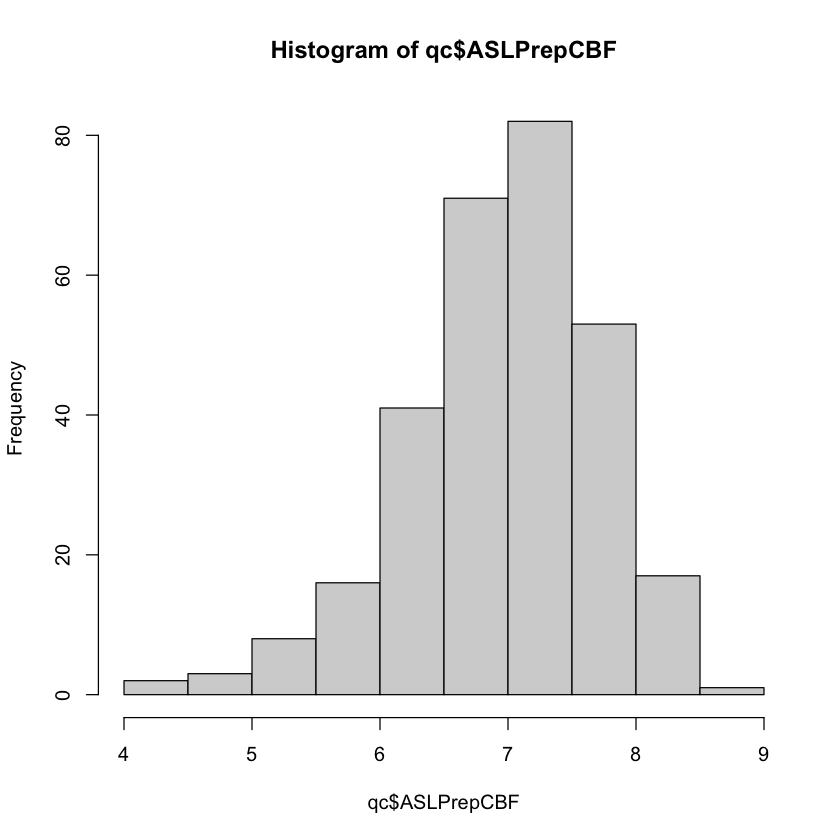

In [44]:
hist(qc$ASLPrepCBF)

In [47]:
qc

sub,PreviousPipeline,ASLPrepCBF,ASLPrepSCRUB,ASLPrepBASIL,ASLPrepPVGM
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3103368139,5.077679,6.146335,6.503259,10.83579,12.55728
1163553824,6.273046,6.558514,7.131801,11.40450,12.49404
1006151876,7.410274,7.100657,7.561153,11.08934,12.28571
1006151876,7.410274,7.100657,7.561153,11.08934,12.28571
1103118018,6.894661,7.061756,7.596220,11.49628,12.44688
1103118018,6.894661,7.061756,7.596220,11.49628,12.44688
1114035056,5.060656,6.546036,8.080558,12.89087,13.81275
1095340536,6.909360,6.858604,8.003816,10.61095,12.27091
3264978932,6.094896,5.766928,6.713305,11.01388,12.35065
